In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import arff as arf

ModuleNotFoundError: No module named 'arff'

# First Implementation


In [ ]:
file = open("dataset/final-dataset.arff")
decoder=arf.ArffDecoder()
data=decoder.decode(file,encode_nominal=True)

In [ ]:
vals=[val[0: -1] for val in data ['data']]
labels= [lab[-1] for lab  in data ['data']]

In [ ]:
da=set(labels)
beac=600
temp1=[]
tempd=[]
for 1 in da:
    coun=0
    while coun<brac:
        for j in range(len(labels))
        if labels[j]:
            temp1.append(labels[j])
            tempd.append(vals[j])
            coun+=1
            if coun==brac:
                break
vals=tempd
labels=temp1

In [ ]:
l=len(vals)

In [ ]:
X_train, X_test, Y_train,Y_test=train_test_split(vals,labels,stratify=labels,test_size=0.2,random_state=0)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
y_train=np.array(Y_train)
y_test=np.array(Y_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors= 5)
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print((accuracy_score(y_pred, y_test))*100,%)

In [ ]:
train_x,val_x,train_y,val_y=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape)

In [ ]:
columns=['SRC_ADD','DES_ADD','PKT_ID','FROM_NODE','TO_NODE','PKT_TYPE','PKT_SIZE','FID','SEQ_NUMBER','NUMBER_OF_PKT','NUMBER_OF_BYTE','NODE_NAME_FROM','NODE_NAME_TO','PKT_IN','PKT_OUT','PKT_R','PKT_DELAY_NODE','PKT_RATE','BYTE_RATE','PKT_AVG_SIZE','UTILIZATION','PKT_DELAY','PKT_SEND_TIME','PKT_RESEVED_TIME','FIRST_PKT_SENT','LAST_PKT_RESEVED']

In [ ]:
model=SVC(kernel='sigmoid',gamma='auto')
model1.fit(train_x,train_y)
y_val_pred1=model1.predict(val_x)
y_val_pred1=pd.DataFrame(y_val_pred1)
y_test_pred1=model1.predict(x_test)
y_test_pred1=pd.DataFrame(y_test_pred1)

In [ ]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
y_val_pred2=model2.predict(val_x)
y_val_pred2=pd.DataFrame(y_val_pred2)
y_test_pred2=model2.predict(x_test)
y_test_pred2=pd.DataFrame(y_test_pred2)


In [ ]:
model3=GaussianNB()
model3.fit(train_x,train_y)
y_val_pred3=model3.predict(val_x)
y_val_pred3=pd.DataFrame(y_val_pred3)
y_test_pred3=model3.predict(x_test)
y_test_pred3=pd.DataFrame(y_test_pred3)

In [ ]:
val_input=pd.concat([pd.DataFrame(val_x,columns=columns),y_val_pred1,y_val_pred2,y_val_pred3],axis=1)
test_input=pd.concat([pd.DataFrame(x_test,columns=columns),y_test_pred1,y_test_pred2,y_test_pred3],axis=1)

In [ ]:
model=RandomForestClassifier(n_estimators=200)
model.fit(val_input,val_y)

In [ ]:
print(model.score(test_input,y_test)*100,"%")

# Implementation 2

## First test

Importation of some libraries

In [2]:
import Code.creation_dataset as cd # 
import Code.knn as knn# use of another implementation of the knn
import matplotlib.pylab as plt

Generation of the dataset

In [3]:
# DDoS element
ddos = cd.read_document("dataset/ddos_dataset.csv") + cd.read_document("dataset/ddos_att_dataset.csv") + cd.read_document("dataset/ddos_full_dataset.csv")
# When the traffic is normal
normal = cd.read_document("dataset/norm_dataset.csv") + cd.read_document("dataset/normal_full_dataset.csv")

y= []
for k in range(len(ddos)):
    if k < 10: # due to the implementation the first 10 rows of the ddos element are normal and not DDoS
        y.append(-1) # -1 represents normal traffic
    else:
        y.append(1) # 1 represents DDoS

for k in range(len(normal)):
    y.append(-1)

dataset = ddos+normal
X = np.array(dataset)
y = np.array(y)


Splitting the dataset

In [4]:
X_train, X_res, y_train, y_res = train_test_split(X, y, train_size= 0.7)
X_test, X_val, y_test, y_val =  train_test_split(X_res, y_res, train_size= 0.6)

Creation and training of the model to test it

In [6]:
model =  knn.KNN(3)
model.train(X_train, y_train)

Test on the testing set

In [7]:
y_pred = model.predict(X_test, 2)
nb_true = 0
for k in range(y_pred.size):
    if y_pred[k] == y_test[k]:
        nb_true += 1
print((nb_true/y_pred.size)*100)

98.9010989010989


/home/masson/Documents/EURECOM/malis-project/Code/knn.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_hat, _ = stats.mode(neighbors, axis=1) #As seen in the lecture, we use the mode to assign labels to the new data


Test on the validation set

In [7]:
y_valid = model.predict(X_val, 2)
nb_true_val = 0
for k in range(y_valid.size):
    if y_valid[k] == y_val[k]:
        nb_true_val += 1
print((nb_true_val/y_valid.size)*100)

96.72131147540983


## Optimisation

### Determine the value of K

Lists that allow the plot of the result according to the evolution of k

In [8]:
x = []
res_test = []
res_val = []

Experiment :

In [9]:
for k in range(1, 200):
    x.append(k)
    
    model =  knn.KNN(k)
    model.train(X_train, y_train) # the training, testing and validation set are the same from the last part
    
    y_pred = model.predict(X_test, 2)
    nb_true = 0
    for k in range(y_pred.size):
        if y_pred[k] == y_test[k]:
            nb_true += 1
    res_test.append((nb_true/y_pred.size)*100)
    
    y_valid = model.predict(X_val, 2)
    nb_true_val = 0
    for k in range(y_valid.size):
        if y_valid[k] == y_val[k]:
            nb_true_val += 1
    res_val.append((nb_true_val/y_valid.size)*100)

Presentation of the results

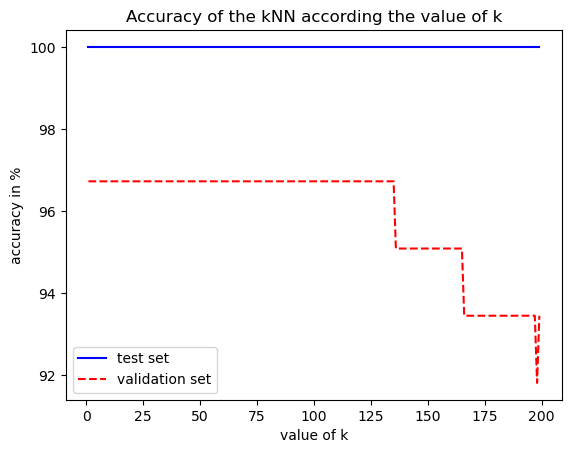

In [10]:
plt.plot(x, res_test,"b", label = "test set")
plt.plot(x, res_val,"r--", label = "validation set")
plt.title("Accuracy of the kNN according the value of k")
plt.xlabel("value of k")
plt.ylabel("accuracy in %")
plt.legend()

According to above graph, 10 seems to good value to test the minimun of training point needed

## Determine the minimun training set to use the implementation

Lists that allow the plot of the result according to the evolution of percentage of dataset used in the training

In [11]:
x = []
res_test = []
res_val = []

Experiment

In [12]:
for k in range(20, 80, 5):
    
    x.append(k)
    
    # we recreate the set for the experiment
    X_train, X_res, y_train, y_res = train_test_split(X, y, train_size= k/100)
    X_test, X_val, y_test, y_val =  train_test_split(X_res, y_res, train_size= 0.7)
    
    model = knn.KNN(10)
    model.train(X_train, y_train)
    
    y_pred = model.predict(X_test, 2)
    nb_true = 0
    for k in range(y_pred.size):
        if y_pred[k] == y_test[k]:
            nb_true += 1
    res_test.append((nb_true/y_pred.size)*100)
    
    y_valid = model.predict(X_val, 2)
    nb_true_val = 0
    for k in range(y_valid.size):
        if y_valid[k] == y_val[k]:
            nb_true_val += 1
    res_val.append((nb_true_val/y_valid.size)*100)

Presentation of the results

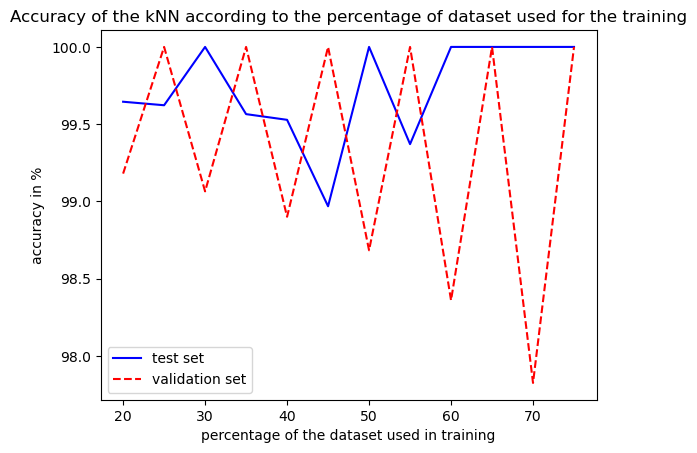

In [13]:
plt.plot(x, res_test,"b", label = "test set")
plt.plot(x, res_val,"r--", label = "validation set")
plt.title("Accuracy of the kNN according to the percentage of dataset used for the training")
plt.xlabel("percentage of the dataset used in training")
plt.ylabel("accuracy in %")
plt.legend()

It is impossible to conclude anything about this result

## Test of the predict_train function

Lists that allow the plot of the result according to the evolution of percentage of dataset used in the training

In [29]:
x = []
res_test = []
res_val = []

First Experiment:

In [30]:
for k in range(20, 80, 5):
    
    x.append(k)
    
    X_train, X_res, y_train, y_res = train_test_split(X, y, train_size= k/100)
    X_test, X_val, y_test, y_val =  train_test_split(X_res, y_res, train_size= 0.7)
    
    model = knn.KNN(10)
    model.train(X_train, y_train)
    y_pred = model.predict_train(X_test, 2)
    nb_true = 0
    for k in range(y_pred.size):
        if y_pred[k] == y_test[k]:
            nb_true += 1
    res_test.append((nb_true/y_pred.size)*100)
    
    y_valid = model.predict(X_val, 2)
    nb_true_val = 0
    for k in range(y_valid.size):
        if y_valid[k] == y_val[k]:
            nb_true_val += 1
    res_val.append((nb_true_val/y_valid.size)*100)

Presentation of the results

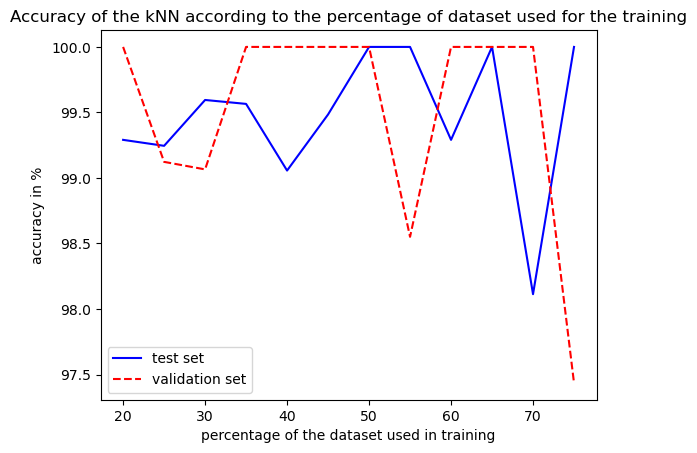

In [28]:
plt.plot(x, res_test,"b", label = "test set")
plt.plot(x, res_val,"r--", label = "validation set")
plt.title("Accuracy of the kNN according to the percentage of dataset used for the training")
plt.xlabel("percentage of the dataset used in training")
plt.ylabel("accuracy in %")
plt.legend()

It is impossible to conclude that the implementation of predict work

List for the result of the secoind experiment

In [59]:
x = [0] # this value is when only the training set is used
res_val = []

Second Experiment :

In [60]:
X_train, X_res, y_train, y_res = train_test_split(X, y, train_size= 0.15) # we used a very small dataset to watch the impact of it
X_test, X_val, y_test, y_val =  train_test_split(X_res, y_res, train_size= 0.6)


model = knn.KNN(10)
model.train(X_train, y_train)


# first test on the training set
y_valid = model.predict(X_val, 2)
nb_true_val = 0
for k in range(y_valid.size):
    if y_valid[k] == y_val[k]:
        nb_true_val += 1
res_val.append((nb_true_val/y_valid.size)*100)

for k in range(X_test.shape[0]):
    x.append(k+1)
    y_test = model.predict_train(np.array([X_test[k]]),2)
    y_valid = model.predict(X_val, 2)
    nb_true_val = 0
    for k in range(y_valid.size):
        if y_valid[k] == y_val[k]:
            nb_true_val += 1
    res_val.append((nb_true_val/y_valid.size)*100)

75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
3

In [ ]:
Results :

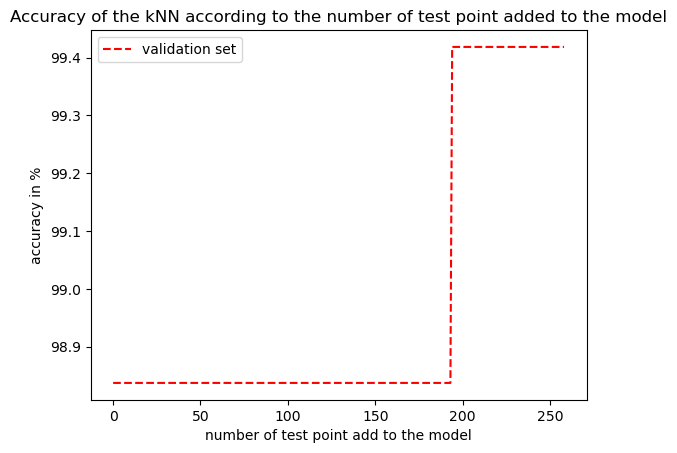

In [62]:
plt.plot(x, res_val,"r--", label = "validation set")
plt.title("Accuracy of the kNN according to the number of test point added to the model")
plt.xlabel("number of test point add to the model")
plt.ylabel("accuracy in %")
plt.legend()

The adding of new point allow to the model to increase the prediction's accuracy